# Project: Predicting users’ personality trait based groups and users’ recommendation

Github Link : https://github.com/S-Delowar/Data_Analytics_Project/tree/main/DA%20group%20project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Descriptive Analysis with IPIP Scores (like sheet)

In [3]:
df = pd.read_csv('IPIP Scores_likes.csv')

In [4]:
df.head()

,Filename,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Unnamed: 71,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,A M Tauhidul Karim Drubo_AIUB_likes.txt,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.0,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,NaN,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,aarif hossain-693654204025796.txt,1461,20.29,0.0,51.33,56.61,31.69,30.18,5.48,3.70,0.55,1.37,0.96,0.48,0.34,1.78,4.79,4.79,3.22,0.34,3.70,0.68,1.37,11.02,2.94,0.48,4.72,2.40,0.0,7.60,0.14,0.07,0.48,3.56,3.15,0.41,0.14,0.07,0.07,9.45,1.16,1.10,0.41,0.68,1.30,0.41,3.49,0.68,0.75,0.34,0.21,0.00,1.10,0.34,0.27,0.14,0.34,7.80,1.30,4.11,2.40,4.24,2.40,3.29,0.41,1.03,0.27,0.00,0.07,0.00,0.14,NaN,0.8,0.800,0.7,0.6,0.4,0.6,0.5,0.7,0.8,0.7
2,Abdul Motalib Shaykat_AIUB_likes.txt,1319,17.59,0.0,47.99,59.44,31.24,31.01,4.32,3.03,0.68,1.29,0.68,0.30,0.08,1.29,5.99,4.32,2.88,0.08,4.17,0.08,1.06,11.60,2.81,0.23,4.85,3.64,0.0,7.58,0.08,0.15,0.61,5.38,5.08,0.15,0.15,0.00,0.00,8.87,0.91,1.06,0.30,0.83,1.06,0.30,3.71,0.76,1.97,0.76,0.68,0.23,1.21,0.53,0.23,0.00,0.45,7.81,1.36,4.17,1.97,4.78,2.35,5.23,0.15,0.99,0.30,0.00,0.08,0.08,0.15,NaN,1.0,0.733,0.6,1.0,0.7,0.9,1.0,1.0,0.9,0.9
3,Abhijit Mondal_AIUB_likes.txt,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.0,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,NaN,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
4,abhishek Saha_AIUB_likes.txt,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.0,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,NaN,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8


In [5]:
df.shape

(251, 82)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Filename        251 non-null    object 
 1   WC              251 non-null    int64  
 2   WPS             251 non-null    float64
 3   Qmarks          251 non-null    float64
 4   Unique          251 non-null    float64
 5   Dic             251 non-null    float64
 6   Sixltr          251 non-null    float64
 7   funct           251 non-null    float64
 8   pronoun         251 non-null    float64
 9   ppron           251 non-null    float64
 10  i               251 non-null    float64
 11  we              251 non-null    float64
 12  you             251 non-null    float64
 13  shehe           251 non-null    float64
 14  they            251 non-null    float64
 15  ipron           251 non-null    float64
 16  article         251 non-null    float64
 17  verb            251 non-null    flo

In [7]:
df.drop('Unnamed: 71', axis=1, inplace=True)

In [8]:
df.shape

(251, 81)

In [9]:
df.isnull().sum()

Filename        0
WC              0
WPS             0
Qmarks          0
Unique          0
               ..
Achievement     0
Power           0
Security        0
Conformity      0
Tradition       0
Length: 81, dtype: int64

In [10]:
df_big5 = pd.read_excel('Data.xlsx')

In [11]:
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m


In [12]:
df_big5 = df_big5.dropna()

In [13]:
df_big5.isnull().sum()

Filename             0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
Gender               0
dtype: int64

In [14]:
df_big5.shape

(163, 7)

In [15]:
# Statistics Analysis for df_big5 dataframe
summary_df_big5 = df_big5.describe()
summary_df_big5.loc['median'] = df_big5.median()
summary_df_big5.loc['skewness'] = df_big5.skew()
summary_df_big5.loc['kurtosis'] = df_big5.kurt()
summary_df_big5.loc['variance'] = df_big5.var()
summary_df_big5.loc['mad'] = df_big5.mad()
summary_df_big5.round(decimals= 3)

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
count,163.000,163.000,163.000,163.000,163.000
mean,0.633,0.573,0.518,0.647,0.477
std,0.094,0.144,0.098,0.102,0.166
min,0.375,0.194,0.156,0.361,0.125
25%,0.575,0.472,0.469,0.583,0.375
50%,0.650,0.583,0.500,0.639,0.469
75%,0.700,0.667,0.594,0.694,0.562
max,0.875,0.917,0.750,0.944,0.906
median,0.650,0.583,0.500,0.639,0.469
skewness,-0.283,-0.028,-0.206,0.053,0.362


## Outliers

In [16]:
df.shape

(251, 81)

In [17]:
df2 = df.drop('Filename', axis=1)
z_scores = np.abs((df2 - df2.mean()) / df2.std())

# Set the threshold for outliers
threshold = 3

# Find the outliers in each column
outliers = z_scores > threshold

# Print the outliers
outliers.head(10)

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [18]:
total_outliers = outliers.sum()
total_outliers = pd.DataFrame(total_outliers)
print('Total Outliers:')
total_outliers.transpose()

Total Outliers:


,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,8,4,4,3,3,1,2,2,2,2,1,1,3,3,3,1,4,3,2,2,2,2,1,2,5,2,3,8,1,3,3,1,3,3,5,3,5,4,3,2,3,3,3,2,3,2,3,3,3,4,3,4,4,1,3,5,2,2,1,4,3,4,3,3,2,4,4,3,4,3,1,2,1,2,1,1,0,3,0,3


## Outliers for df_big5

In [19]:
new_df = df_big5.drop('Filename', axis=1)
z_scores = np.abs((new_df - new_df.mean()) / new_df.std())

# Set the threshold for outliers
threshold = 3

# Find the outliers in each column
outliers = z_scores > threshold

# outliers
total_outliers = outliers.sum()
total_outliers = pd.DataFrame(total_outliers)
print('Total Outliers of Big5:')
total_outliers.transpose()

Total Outliers of Big5:


,Agreeableness,Conscientiousness,Extraversion,Gender,Neuroticism,Openness
0,0,0,1,0,0,0


## Merging two dataframes

In [20]:
df['First Name'] = df['Filename'].str.split('.').str[0]
df['Name'] = df['First Name'].str.replace('_likes', '')
df.drop('First Name', axis=1, inplace=True)
df.shape

(251, 82)

In [21]:
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m


In [22]:
df_big5['First Name'] = df_big5['Filename'].str.split('.').str[0]
df_big5['Name'] = df_big5['First Name'].str.replace('_status', '')
df_big5.drop('First Name', axis=1, inplace=True)
df_big5.head()

,Filename,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Name
0,A M Tauhidul Karim Drubo_AIUB_status.txt,0.625,0.889,0.469,0.750,0.375,m,A M Tauhidul Karim Drubo_AIUB
1,Abhijit Mondal_AIUB_status.txt,0.700,0.722,0.531,0.694,0.469,m,Abhijit Mondal_AIUB
2,abhishek Saha_AIUB_status.txt,0.650,0.389,0.562,0.528,0.500,m,abhishek Saha_AIUB
3,Abir Md Moshiur Rahman_AIUB_status.txt,0.750,0.611,0.531,0.833,0.375,m,Abir Md Moshiur Rahman_AIUB
4,abir Tanzin Adnan_AIUB_status.txt,0.650,0.667,0.500,0.778,0.250,m,abir Tanzin Adnan_AIUB


In [23]:
merged_df = pd.merge(df_big5, df, on='Name')

In [24]:
merged_df.drop(['Filename_x', 'Filename_y'], axis=1, inplace=True)


In [25]:
cols = merged_df.columns.tolist()
cols = [cols[6]] + cols[0:6] + cols[7:]
merged_df = merged_df[cols]

In [26]:
merged_df.shape

(157, 87)

In [27]:
merged_df.head()

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,A M Tauhidul Karim Drubo_AIUB,0.625,0.889,0.469,0.750,0.375,m,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,Abhijit Mondal_AIUB,0.700,0.722,0.531,0.694,0.469,m,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,abhishek Saha_AIUB,0.650,0.389,0.562,0.528,0.500,m,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,Abir Md Moshiur Rahman_AIUB,0.750,0.611,0.531,0.833,0.375,m,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,abir Tanzin Adnan_AIUB,0.650,0.667,0.500,0.778,0.250,m,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


In [28]:
cols_to_keep = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
new_df = merged_df[cols_to_keep].copy()
des = new_df.describe()


# Working with "Openness" 

**Big5 Personality Traits Prediction with Machine Learning Classification**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
openness_df= merged_df
openness_df.drop(columns=['Conscientiousness','Extraversion', 'Agreeableness', 'Neuroticism','Gender','Name'],inplace = True)

# copy for later uses
openness_df_1 = openness_df.copy()

openness_df.head()

,Openness,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,0.625,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,0.700,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,0.650,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,0.750,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,0.650,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


# Classification

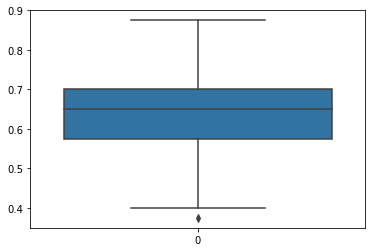

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=openness_df['Openness']);

Convert Openness values into three categories according to quadratic values: 

In [32]:
def get_category(val, q1, q3):
    if val > q3:
        return 'high'
    elif val < q1:
        return 'low'
    else:
        return 'medium'

q1 = openness_df['Openness'].quantile(0.25)
q3 = openness_df['Openness'].quantile(0.75)

openness_df['Openness_Category'] = openness_df['Openness'].apply(get_category, args=(q1, q3))
openness_df = openness_df.drop('Openness', axis=1)

In [33]:
openness_df

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_Category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8,medium
3,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
4,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1004,24.49,0.0,53.78,59.86,27.79,32.37,6.37,4.28,0.20,2.09,1.69,0.30,0.00,2.09,4.48,5.08,3.09,0.30,4.58,0.20,1.69,9.96,3.69,0.40,6.18,2.99,0.00,9.36,0.10,0.10,0.70,5.88,4.98,0.80,0.30,0.30,0.10,10.86,1.39,1.20,0.30,1.59,1.79,0.30,3.59,0.90,0.80,0.40,0.00,0.30,0.70,0.20,0.20,0.30,0.20,8.07,1.79,3.78,2.59,3.19,1.49,3.59,0.30,1.79,0.10,0.00,0.10,0.10,0.40,1.0,0.733,0.8,0.8,0.9,0.9,0.4,0.8,0.7,0.7,medium
153,1337,17.83,0.0,47.12,65.00,28.20,35.60,7.03,4.34,0.30,1.35,2.24,0.45,0.00,2.69,5.98,6.06,4.34,0.22,5.16,0.37,1.87,11.52,3.22,0.37,4.64,2.32,0.00,9.27,0.30,0.15,0.75,4.86,4.56,0.30,0.22,0.00,0.07,11.44,1.05,1.80,0.45,1.05,1.87,0.15,3.81,0.97,2.02,0.90,0.00,0.60,2.39,0.52,0.60,0.15,1.12,8.75,1.50,4.56,2.62,3.52,1.50,2.62,0.67,1.20,0.37,0.07,0.15,0.00,0.22,0.9,0.933,0.8,0.7,0.5,0.7,0.5,1.0,0.4,0.7,high
154,1125,18.15,0.0,53.87,64.53,30.93,34.49,7.73,4.89,0.53,2.49,1.87,0.00,0.00,2.84,4.36,6.40,4.27,0.09,5.78,0.36,1.16,12.44,2.93,0.27,3.11,2.76,0.00,9.24,0.09,0.44,0.62,4.53,4.18,0.36,0.09,0.00,0.09,11.29,1.78,1.60,0.71,1.24,0.98,0.36,4.27,0.80,1.42,0.53,0.00,0.62,1.3

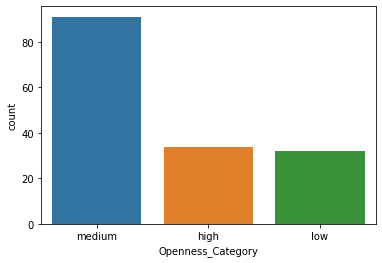

In [34]:
# Checking balancing of data

sns.countplot(data=openness_df, x= 'Openness_Category');

Hence, data are not balanced here, we need to balance the data according to openness_category column. We will use SMOTE method of balancing here.

In [35]:
x = openness_df.drop('Openness_Category', axis=1)
y = openness_df[['Openness_Category']]

In [36]:
x

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1004,24.49,0.0,53.78,59.86,27.79,32.37,6.37,4.28,0.20,2.09,1.69,0.30,0.00,2.09,4.48,5.08,3.09,0.30,4.58,0.20,1.69,9.96,3.69,0.40,6.18,2.99,0.00,9.36,0.10,0.10,0.70,5.88,4.98,0.80,0.30,0.30,0.10,10.86,1.39,1.20,0.30,1.59,1.79,0.30,3.59,0.90,0.80,0.40,0.00,0.30,0.70,0.20,0.20,0.30,0.20,8.07,1.79,3.78,2.59,3.19,1.49,3.59,0.30,1.79,0.10,0.00,0.10,0.10,0.40,1.0,0.733,0.8,0.8,0.9,0.9,0.4,0.8,0.7,0.7
153,1337,17.83,0.0,47.12,65.00,28.20,35.60,7.03,4.34,0.30,1.35,2.24,0.45,0.00,2.69,5.98,6.06,4.34,0.22,5.16,0.37,1.87,11.52,3.22,0.37,4.64,2.32,0.00,9.27,0.30,0.15,0.75,4.86,4.56,0.30,0.22,0.00,0.07,11.44,1.05,1.80,0.45,1.05,1.87,0.15,3.81,0.97,2.02,0.90,0.00,0.60,2.39,0.52,0.60,0.15,1.12,8.75,1.50,4.56,2.62,3.52,1.50,2.62,0.67,1.20,0.37,0.07,0.15,0.00,0.22,0.9,0.933,0.8,0.7,0.5,0.7,0.5,1.0,0.4,0.7
154,1125,18.15,0.0,53.87,64.53,30.93,34.49,7.73,4.89,0.53,2.49,1.87,0.00,0.00,2.84,4.36,6.40,4.27,0.09,5.78,0.36,1.16,12.44,2.93,0.27,3.11,2.76,0.00,9.24,0.09,0.44,0.62,4.53,4.18,0.36,0.09,0.00,0.09,11.29,1.78,1.60,0.71,1.24,0.98,0.36,4.27,0.80,1.42,0.53,0.00,0.62,1.33,0.27,0.27,0.27,0.53,10.13,0.89,5.42,4.18,6.49,3.11,1.16,0.53,1.24

In [37]:
y

,Openness_Category
0,medium
1,medium
2,medium
3,high
4,medium
...,...
152,medium
153,high
154,high
155,medium


##### Synthetic Minority Oversampling Tenique (SMOTETomek)

In [38]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state= 42)
X_new, y_new = sm.fit_resample(x, y)

In [39]:
X_new.shape

(233, 80)

In [40]:
y_new.shape

(233, 1)

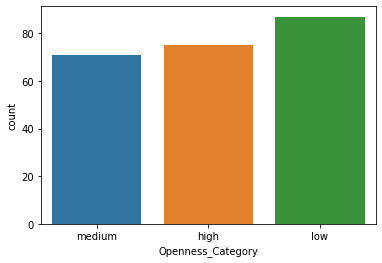

In [41]:
sns.countplot(data=y_new, x= 'Openness_Category');

In [42]:
y_new['Openness_Category'].value_counts()

low       87
high      75
medium    71
Name: Openness_Category, dtype: int64

In [43]:
# Downloading sampled dataset
df_sampled = X_new
df_sampled['Openness_category'] = y_new['Openness_Category']
df_sampled.to_csv('sampled_df.csv', index=False)

In [44]:
df_sampled.head()

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
3,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium
4,827,18.80,0.0,51.87,61.55,29.38,30.23,4.96,3.39,0.36,1.69,0.97,0.12,0.24,1.57,5.08,5.20,3.39,0.12,4.59,0.24,1.33,11.49,1.81,0.12,5.08,3.51,0.00,6.89,0.36,0.00,0.36,4.84,4.47,0.36,0.00,0.00,0.24,8.10,1.09,0.36,0.48,0.48,1.21,0.73,2.90,0.60,2.06,0.60,0.85,0.48,0.24,0.00,0.24,0.00,0.00,11.49,1.09,6.17,3.99,3.63,2.06,4.23,0.24,1.69,0.48,0.00,0.12,0.00,0.60,0.9,0.533,0.8,0.5,0.7,0.4,0.9,0.8,0.7,1.0,medium


In [45]:
df_sampled.shape

(233, 81)

### Feature Engineering

#### Extra Tree Classifier

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier()
extra_clf.fit(x, y)
feature_importance = extra_clf.feature_importances_
feature_importance

array([0.01472332, 0.00904694, 0.        , 0.01951214, 0.01508303,
       0.01373407, 0.0122514 , 0.01238323, 0.01231024, 0.0142707 ,
       0.01440446, 0.00993741, 0.00851994, 0.01173855, 0.00882215,
       0.01176635, 0.01186784, 0.01297214, 0.01479181, 0.01166878,
       0.01091694, 0.01199318, 0.01181476, 0.01235568, 0.01042777,
       0.01085492, 0.0122113 , 0.01014167, 0.01102949, 0.01098923,
       0.00977987, 0.01297677, 0.01333361, 0.01435244, 0.00963395,
       0.01046322, 0.00906955, 0.01336589, 0.01151904, 0.01142226,
       0.01372594, 0.01334701, 0.00933741, 0.01429971, 0.01667529,
       0.00976585, 0.01183863, 0.00881767, 0.01063698, 0.02479503,
       0.00882923, 0.01048092, 0.00971629, 0.01093962, 0.01248664,
       0.01449281, 0.01014725, 0.01092211, 0.01023191, 0.01072732,
       0.01252535, 0.018346  , 0.00846208, 0.01684127, 0.01033501,
       0.01722327, 0.01148912, 0.01215986, 0.01062257, 0.01163427,
       0.01296842, 0.01437895, 0.03142585, 0.01244678, 0.01349

In [47]:
imp = pd.DataFrame(feature_importance, columns = ['feature_score'])
imp

,feature_score
0,0.014723
1,0.009047
2,0.000000
3,0.019512
4,0.015083
...,...
75,0.011832
76,0.014443
77,0.008442
78,0.025350


In [48]:
X_new.columns
cols = pd.DataFrame(x.columns, columns = ['feature_names'])
gains = pd.concat([cols, imp], axis=1)
gains

,feature_names,feature_score
0,WC,0.014723
1,WPS,0.009047
2,Qmarks,0.000000
3,Unique,0.019512
4,Dic,0.015083
...,...,...
75,Achievement,0.011832
76,Power,0.014443
77,Security,0.008442
78,Conformity,0.025350


In [49]:
# Sort all with respect to gain_score
gains.nlargest(gains.shape[0], 'feature_score')

,feature_names,feature_score
72,Self-direction,0.031426
78,Conformity,0.025350
49,hear,0.024795
3,Unique,0.019512
61,achieve,0.018346
...,...,...
47,percept,0.008818
12,shehe,0.008520
62,leisure,0.008462
77,Security,0.008442


In [50]:
gains_all = gains.nlargest(gains.shape[0], 'feature_score')

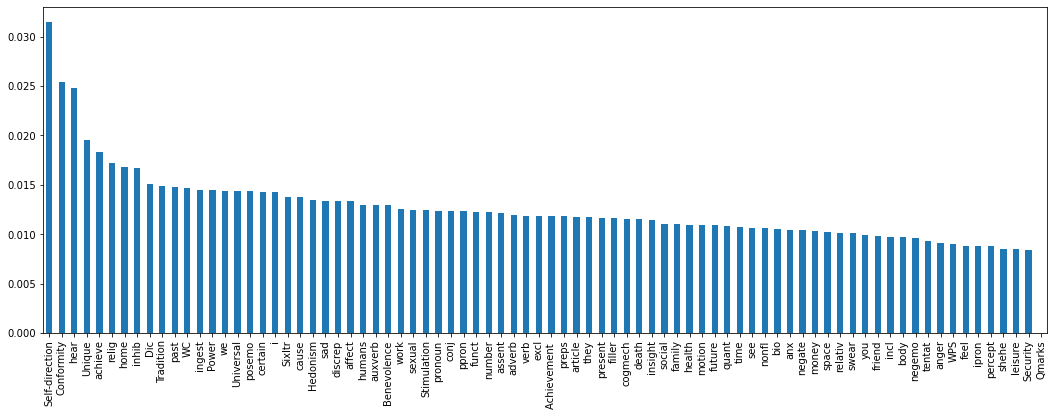

In [51]:
features = pd.Series(feature_importance, index = x.columns)
plt.figure(figsize= (18,6));
features.nlargest(features.shape[0]).plot(kind = 'bar');

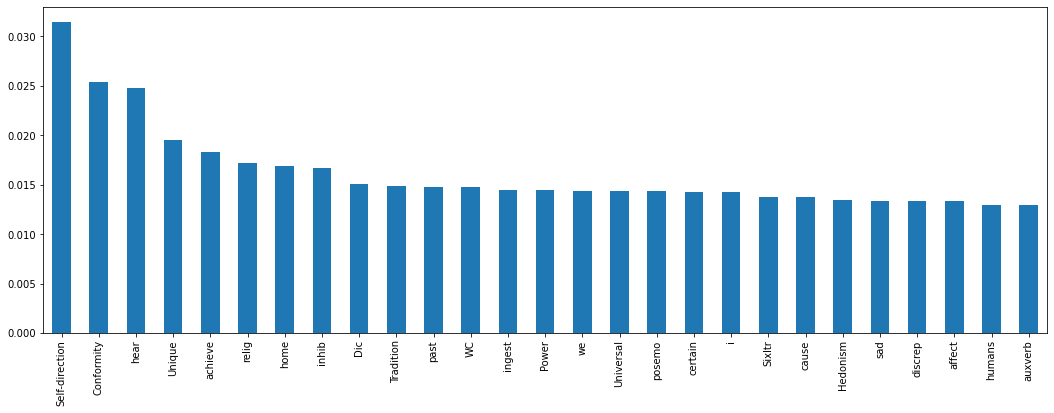

In [52]:
features = pd.Series(feature_importance, index = x.columns)
plt.figure(figsize= (18,6));
features.nlargest(27).plot(kind = 'bar');

In [53]:
most_gains = gains.nlargest(27, 'feature_score')
most_gains

,feature_names,feature_score
72,Self-direction,0.031426
78,Conformity,0.025350
49,hear,0.024795
3,Unique,0.019512
61,achieve,0.018346
65,relig,0.017223
63,home,0.016841
44,inhib,0.016675
4,Dic,0.015083
79,Tradition,0.014914


In [54]:
X_new = X_new[most_gains.feature_names]
# most_gains.feature_names

featured_columns = X_new.columns

In [55]:
featured_columns

Index(['Self-direction', 'Conformity', 'hear', 'Unique', 'achieve', 'relig',
       'home', 'inhib', 'Dic', 'Tradition', 'past', 'WC', 'ingest', 'Power',
       'we', 'Universal', 'posemo', 'certain', 'i', 'Sixltr', 'cause',
       'Hedonism', 'sad', 'discrep', 'affect', 'humans', 'auxverb'],
      dtype='object')

In [56]:
X_new.head()

,Self-direction,Conformity,hear,Unique,achieve,relig,home,inhib,Dic,Tradition,past,WC,ingest,Power,we,Universal,posemo,certain,i,Sixltr,cause,Hedonism,sad,discrep,affect,humans,auxverb
0,1.0,0.9,0.63,49.37,2.32,0.56,0.42,0.28,66.01,1.0,0.28,1424,0.14,0.4,1.76,1.000,4.92,1.33,1.12,31.18,1.33,0.9,0.07,0.56,5.34,0.77,3.79
1,0.8,0.6,0.34,48.34,2.92,0.20,0.34,0.20,65.36,0.9,0.75,1475,0.14,0.2,2.17,1.000,4.81,0.95,0.34,30.64,1.56,0.5,0.20,0.54,5.08,0.41,4.20
2,0.4,0.4,0.44,52.84,3.20,0.66,0.44,0.51,63.76,0.9,0.36,1374,0.36,0.6,1.75,0.667,4.22,1.38,0.66,30.42,1.75,0.6,0.29,0.29,4.95,0.44,4.44
3,0.9,0.8,0.09,53.87,2.98,0.43,0.60,0.68,61.87,1.0,0.09,1175,0.34,0.4,1.70,0.733,4.60,0.77,0.26,31.06,1.28,0.8,0.09,0.34,5.02,0.77,3.66
4,0.8,0.7,0.85,51.87,2.06,0.48,0.24,0.73,61.55,1.0,0.12,827,0.00,0.9,1.69,0.533,4.47,1.21,0.36,29.38,0.36,0.7,0.24,0.48,4.84,0.36,3.39


In [57]:
X_new.shape

(233, 27)

In [58]:
y_new.shape

(233, 1)

# Machine Learning Models for Openness

#### Spliting Traing and Test data

Traing 75% and Testing 25%

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 42)

In [60]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [62]:
y_pred = knn.predict(x_test)
knn.score(x_test, y_test)

0.4067796610169492

In [63]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.27      0.35      0.31        17
         low       0.46      0.50      0.48        26
      medium       0.56      0.31      0.40        16

    accuracy                           0.41        59
   macro avg       0.43      0.39      0.40        59
weighted avg       0.43      0.41      0.41        59

Label: low
tp=18, fn=13, fp=15, tn=13
Label: medium
tp=39, fn=11, fp=4, tn=5
Label: high
tp=26, fn=11, fp=16, tn=6


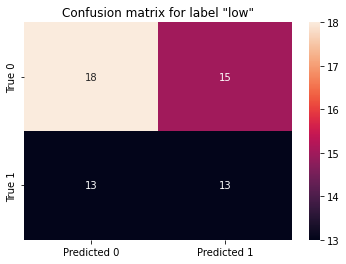

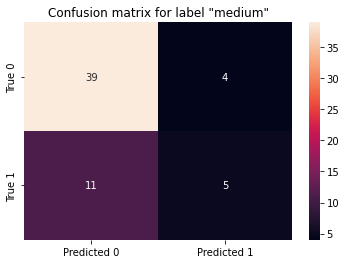

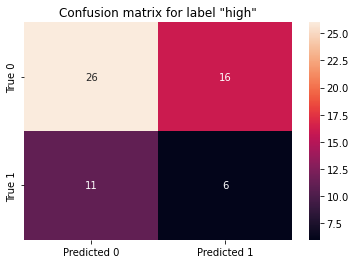

In [64]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()


# Decision Tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [66]:
# features = x.columns
# features
# targets = openness_df.diagnosis

In [67]:
y_pred = dt.predict(x_test)

In [68]:
dt.score(x_test, y_test)

0.7288135593220338

In [69]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.67      0.82      0.74        17
         low       0.81      0.81      0.81        26
      medium       0.67      0.50      0.57        16

    accuracy                           0.73        59
   macro avg       0.71      0.71      0.71        59
weighted avg       0.73      0.73      0.72        59

Label: low
tp=28, fn=5, fp=5, tn=21
Label: medium
tp=39, fn=8, fp=4, tn=8
Label: high
tp=35, fn=3, fp=7, tn=14


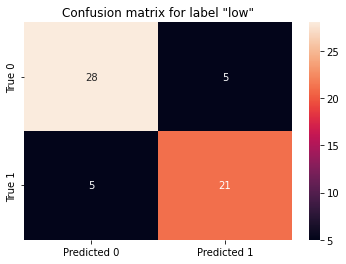

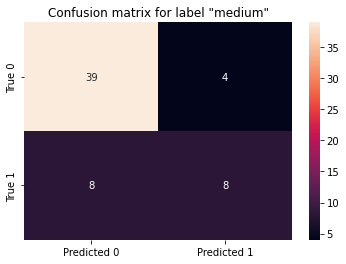

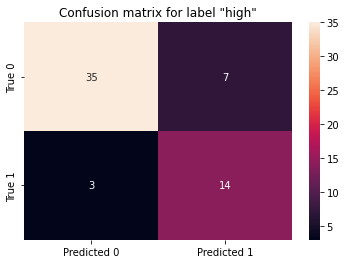

In [70]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.8983050847457628

In [73]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')


              precision    recall  f1-score   support

        high       0.67      0.82      0.74        17
         low       0.81      0.81      0.81        26
      medium       0.67      0.50      0.57        16

    accuracy                           0.73        59
   macro avg       0.71      0.71      0.71        59
weighted avg       0.73      0.73      0.72        59

Label: low
tp=28, fn=5, fp=5, tn=21
Label: medium
tp=39, fn=8, fp=4, tn=8
Label: high
tp=35, fn=3, fp=7, tn=14


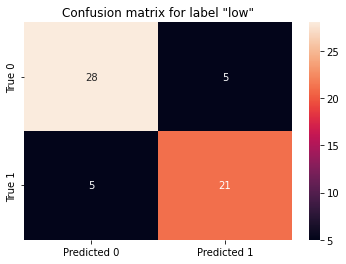

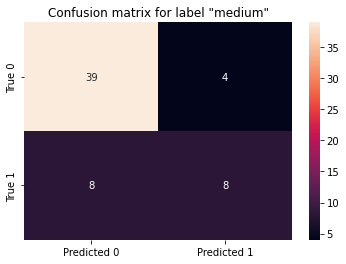

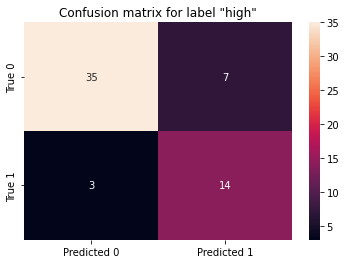

In [74]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

In [75]:
rf_clf = RandomForestClassifier(n_estimators= 100, max_leaf_nodes=16, n_jobs=-1, criterion='entropy', random_state=0)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.847457627118644

# Adaboost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada_clf = AdaBoostClassifier(n_estimators= 100, learning_rate= 0.5)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.6101694915254238

In [78]:
print(classification_report(y_test, y_pred))
labels = ['low', 'medium', 'high']
cm = multilabel_confusion_matrix(y_test, y_pred, labels=labels)

for i, label in enumerate(labels):
    tp, fp, fn, tn = cm[i].ravel()
    print(f'Label: {label}')
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

              precision    recall  f1-score   support

        high       0.67      0.82      0.74        17
         low       0.81      0.81      0.81        26
      medium       0.67      0.50      0.57        16

    accuracy                           0.73        59
   macro avg       0.71      0.71      0.71        59
weighted avg       0.73      0.73      0.72        59

Label: low
tp=28, fn=5, fp=5, tn=21
Label: medium
tp=39, fn=8, fp=4, tn=8
Label: high
tp=35, fn=3, fp=7, tn=14


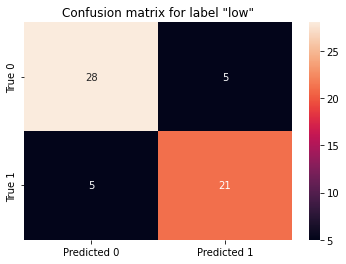

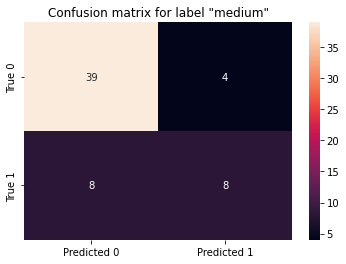

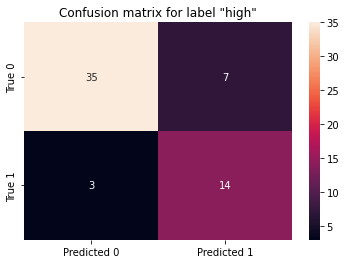

In [79]:
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion matrix for label "{label}"')
    plt.show()

# Regression

### Linear Regression

Working with openness_df_1

In [80]:
openness_df_1.head()

,Openness,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,0.625,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,0.700,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,0.650,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,0.750,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,0.650,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


In [81]:
openness_df_1.isnull().sum()

Openness        0
WC              0
WPS             0
Qmarks          0
Unique          0
               ..
Achievement     0
Power           0
Security        0
Conformity      0
Tradition       0
Length: 81, dtype: int64

In [82]:
x = openness_df_1.drop('Openness', axis=1)
y = openness_df_1[['Openness']]

In [83]:
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (157, 80)
y shape: (157, 1)


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [87]:
#Check Accuracy Score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume y_tr is your ground truth target variable, and y_pred is your predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)


MSE:  0.029901370271302553
RMSE:  0.17292012685428657
MAE:  0.14349678173463612
R-squared:  -2.6632612889804044


Now working with feature engineering:

In [88]:
x = x[featured_columns]

In [89]:
x.shape

(157, 27)

In [90]:
y.shape

(157, 1)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
model_2 = LinearRegression()
model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

MSE:  0.010882301108731124
RMSE:  0.10431826833652447
MAE:  0.08254185701629346
R-squared:  -0.33320687396399684


### Logistic Regression

In [92]:
data = df_sampled
data.head()

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Openness_category
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,medium
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,medium
2,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,high
3,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,medium
4,827,18.80,0.0,51.87,61.55,29.38,30.23,4.96,3.39,0.36,1.69,0.97,0.12,0.24,1.57,5.08,5.20,3.39,0.12,4.59,0.24,1.33,11.49,1.81,0.12,5.08,3.51,0.00,6.89,0.36,0.00,0.36,4.84,4.47,0.36,0.00,0.00,0.24,8.10,1.09,0.36,0.48,0.48,1.21,0.73,2.90,0.60,2.06,0.60,0.85,0.48,0.24,0.00,0.24,0.00,0.00,11.49,1.09,6.17,3.99,3.63,2.06,4.23,0.24,1.69,0.48,0.00,0.12,0.00,0.60,0.9,0.533,0.8,0.5,0.7,0.4,0.9,0.8,0.7,1.0,medium


In [93]:
data.shape


(233, 81)

In [94]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [95]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the training data
softmax_reg.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = softmax_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



Accuracy: 0.6170212765957447


# Clustering

### K-Means Clustering

In [96]:
cluster_df = df_sampled.drop('Openness_category', axis=1)
cluster_df.head()

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
3,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0
4,827,18.80,0.0,51.87,61.55,29.38,30.23,4.96,3.39,0.36,1.69,0.97,0.12,0.24,1.57,5.08,5.20,3.39,0.12,4.59,0.24,1.33,11.49,1.81,0.12,5.08,3.51,0.00,6.89,0.36,0.00,0.36,4.84,4.47,0.36,0.00,0.00,0.24,8.10,1.09,0.36,0.48,0.48,1.21,0.73,2.90,0.60,2.06,0.60,0.85,0.48,0.24,0.00,0.24,0.00,0.00,11.49,1.09,6.17,3.99,3.63,2.06,4.23,0.24,1.69,0.48,0.00,0.12,0.00,0.60,0.9,0.533,0.8,0.5,0.7,0.4,0.9,0.8,0.7,1.0


#### Find Optimal Number of cluster

In [97]:
import sklearn.cluster as cluster

Calculating WCSS (Within-Cluster Sum of Squares):
[ WCSS measures the sum of the squared distances between each point and its assigned cluster center (centroid), averaged over all clusters]

In [98]:
wcss =[]
clusters = range(1,15)
for k in clusters:
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(cluster_df[featured_columns])
  wcss.append(kmeans.inertia_) 

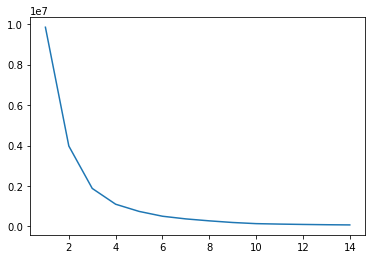

In [99]:
plt.plot(clusters, wcss);

In [100]:
# Knee to see the accurate value of elbow
# !pip install kneed

In [101]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [102]:
total_clusters = kn.knee
total_clusters

4

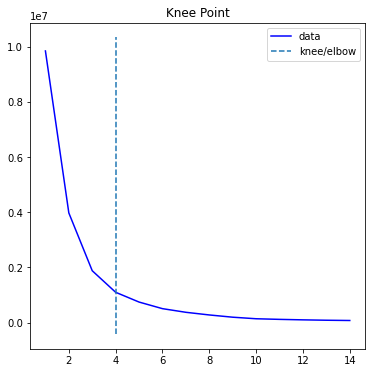

In [103]:
kn.plot_knee()

In [104]:
kmeans = cluster.KMeans(n_clusters= total_clusters)
predicted = kmeans.fit_predict(cluster_df[featured_columns])

##### Clustering with the columns after feature engineering

In [105]:
predicted = kmeans.fit_predict(cluster_df[featured_columns])

In [106]:
cluster_df['new_cluster'] = predicted

In [107]:
cluster_df.head(10)

,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,new_cluster
0,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0,2
1,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9,2
2,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9,2
3,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0,0
4,827,18.80,0.0,51.87,61.55,29.38,30.23,4.96,3.39,0.36,1.69,0.97,0.12,0.24,1.57,5.08,5.20,3.39,0.12,4.59,0.24,1.33,11.49,1.81,0.12,5.08,3.51,0.00,6.89,0.36,0.00,0.36,4.84,4.47,0.36,0.00,0.00,0.24,8.10,1.09,0.36,0.48,0.48,1.21,0.73,2.90,0.60,2.06,0.60,0.85,0.48,0.24,0.00,0.24,0.00,0.00,11.49,1.09,6.17,3.99,3.63,2.06,4.23,0.24,1.69,0.48,0.00,0.12,0.00,0.60,0.9,0.533,0.8,0.5,0.7,0.4,0.9,0.8,0.7,1.0,3
5,1432,16.85,0.0,43.92,65.92,32.19,36.03,7.33,4.75,0.84,1.68,1.89,0.28,0.07,2.58,6.35,5.87,3.35,0.07,5.31,0.28,1.47,12.36,3.14,0.56,4.96,2.09,0.00,9.01,0.00,0.28,0.28,4.75,3.84,0.84,0.35,0.28,0.00,11.80,1.19,1.40,0.21,1.05,1.33,0.70,4.40,0.63,0.63,0.21,0.21,0.14,0.42,0.14,0.14,0.14,0.00,9.78,1.54,5.66,2.03,4.75,2.09,2.93,0.42,1.19,0.07,0.00,0.00,0.00,0.00,0.6,0.533,0.7,0.7,0.5,0.8,0.5,0.8,0.6,0.8,2
6,1330,16.02,0.0,53.91,60.68,31.80,29.77,4.81,3.61,0.15,1.50,1.28,0.53,0.15,1.20,4.66,4.81,2.86,0.23,4.36,0.15,2.03,11.20,3.08,0.30,3.31,3.76,0.00,8.20,0.23,0.00,0.60,3.83,3.61,0.23,0.08,0.15,0.00,10.08,1.43,1.58,0.15,0.68,1.28,0.38,3.91,0.83,1.50,0.60,0.15,0.45,1.05,0.38,0.15,0.15,0.38,12.56,2.48,6.09,3.76,3.83,2.18,4.44,0.60,1.73,0.53,0.30,0.00,0.08,0.38,0.9,0.733,1.0,0.8,0.8,1.0,0.4,0.9,0.6,0.7,2
7,1123,18.11,0.0,51.47,61.00,28.58,32.95,7.30,4.36,0.89,1.69,1.42,0.18,0.18,2.94,5.08,6.68,4.01,0.36,5.52,0.53,1.78,10.42,2.05,0.62,4.99,3.38,0.00,8.28,0.36,0.36,0.89,4.63,4.27,0.36,0.00,0.09,0.27,8.90,0.98,0.98,0.45,0.80,1.16,0.45,2.94,0.80,1.78,0.62,0.53,0.36,0.98,0.09,0.18,0.80,0.00,11.13,1.16,5.88,3.65,2.58,2.14,3.56,0.45,1.16,0.36,0.00,0.09,0.00,0.27,0.8,0.733,0.8,0.7,0.7,0.9,0.7,0.9,0.9,0.9,0
8,1398,16.64,0.0,50.93,64.52,30.69,34.98,7.01,4.43,0.72,1.93,0.93,0.29,0.57,2.58,6.58,6.58,4.22,0.64,5.79,0.00,1.79,11.23,2.93,0.36,4.29,2.00,0.00,8.15,0.00,0.00,0.43,5.44,4.94,0.43,0.00,0.21,0.07,9.94,1.29,1.43,0.29,0.72,1.00,0.36,4.0

In [108]:
cluster_df['new_cluster'].value_counts()

2    114
0     93
3     20
1      6
Name: new_cluster, dtype: int64

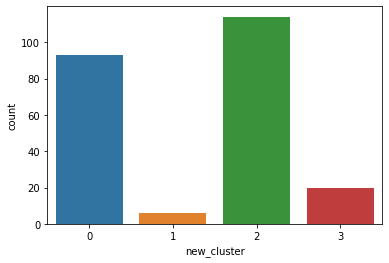

In [109]:
sns.countplot(data = cluster_df, x = 'new_cluster');

In [110]:
centers = kmeans.cluster_centers_

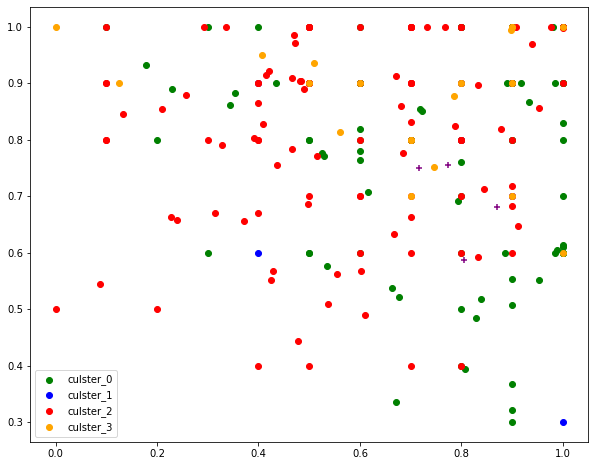

In [111]:
df0 = cluster_df[cluster_df.new_cluster == 0]
df1 = cluster_df[cluster_df.new_cluster == 1]
df2 = cluster_df[cluster_df.new_cluster == 2]
df3 = cluster_df[cluster_df.new_cluster == 3]

plt.figure(figsize=(10,8))
plt.scatter(df0['Conformity'], df0['Self-direction'], color='green', label='culster_0')
plt.scatter(df1['Conformity'], df1['Self-direction'], color='blue', label='culster_1')
plt.scatter(df2['Conformity'], df2['Self-direction'], color='red', label='culster_2')
plt.scatter(df3['Conformity'], df3['Self-direction'], color='orange', label='culster_3')

plt.scatter(centers[:,0], centers[:,1], color='purple', marker='+')

plt.legend()

##### Clustering acording to 'Conformity' and'Self-direction'

In [112]:
predicted = kmeans.fit_predict(cluster_df[['Conformity','Self-direction']])
cluster_df['new_cluster'] = predicted

In [113]:
cluster_df['new_cluster'].value_counts()

1    75
3    63
0    58
2    37
Name: new_cluster, dtype: int64

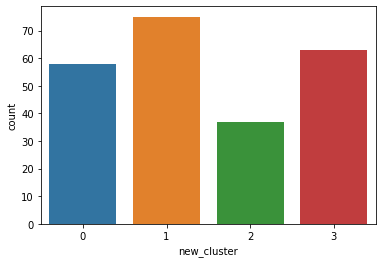

In [114]:
sns.countplot(data = cluster_df, x = 'new_cluster');

In [115]:
centers = kmeans.cluster_centers_
centers

array([[0.8087894 , 0.5692954 ],
       [0.56245365, 0.86646891],
       [0.24791565, 0.77887012],
       [0.90418969, 0.93064235]])

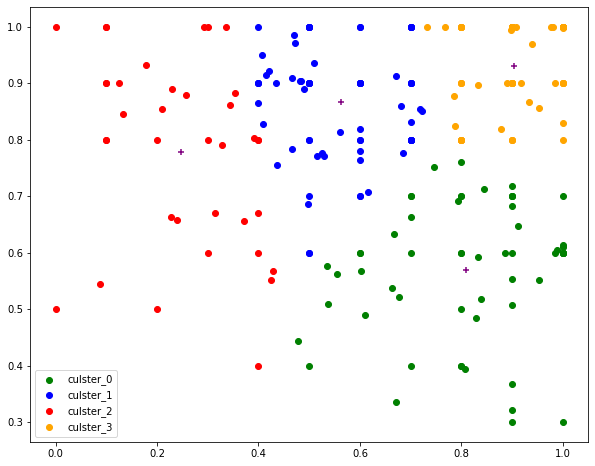

In [116]:
df0 = cluster_df[cluster_df.new_cluster == 0]
df1 = cluster_df[cluster_df.new_cluster == 1]
df2 = cluster_df[cluster_df.new_cluster == 2]
df3 = cluster_df[cluster_df.new_cluster == 3]

plt.figure(figsize=(10,8));
plt.scatter(df0['Conformity'], df0['Self-direction'], color='green', label='culster_0');
plt.scatter(df1['Conformity'], df1['Self-direction'], color='blue', label='culster_1');
plt.scatter(df2['Conformity'], df2['Self-direction'], color='red', label='culster_2');
plt.scatter(df3['Conformity'], df3['Self-direction'], color='orange', label='culster_3');

plt.scatter(centers[:,0], centers[:,1], color='purple', marker='+');

plt.legend();

# Deep Learning

## LSTM

In [117]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# df = df_sampled

# X = df.drop('Openness_category', axis=1).values
# y = df['Openness_category'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(128)
# model.add(Dense(3, activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train.reshape(X_train.shape[0], n_timesteps, n_features), y_train, epochs=10, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], n_timesteps, n_features), y_test))



In [118]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Load data from a CSV file as a pandas DataFrame
# df = df_sampled

# # Split the data into input and target arrays
# X = df.drop('Openness_category', axis=1).values
# y = df['Openness_category'].values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Define the LSTM model
# n_timesteps, n_features = X_train.shape[0], X_train.shape[1]
# model = Sequential()
# model.add(LSTM(128, input_shape=(n_timesteps, n_features)))
# model.add(Dense(3, activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [119]:
openness_df_1.head()

,Openness,WC,WPS,Qmarks,Unique,Dic,Sixltr,funct,pronoun,ppron,i,we,you,shehe,they,ipron,article,verb,auxverb,past,present,future,adverb,preps,conj,negate,quant,number,swear,social,family,friend,humans,affect,posemo,negemo,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,Benevolence,Universal,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition
0,0.625,1424,16.56,0.0,49.37,66.01,31.18,34.83,6.95,4.78,1.12,1.76,1.33,0.49,0.07,2.18,6.18,6.25,3.79,0.28,5.41,0.21,1.54,11.73,3.23,0.14,4.71,2.18,0.00,9.06,0.00,0.28,0.77,5.34,4.92,0.42,0.07,0.21,0.07,9.83,1.05,1.33,0.56,1.12,1.33,0.28,3.79,0.56,1.83,0.56,0.63,0.49,0.70,0.21,0.14,0.21,0.14,10.25,1.76,5.20,3.37,3.93,2.32,3.51,0.42,1.97,0.56,0.14,0.00,0.00,0.42,1.0,1.000,1.0,0.9,0.9,0.9,0.4,0.8,0.9,1.0
1,0.700,1475,16.39,0.0,48.34,65.36,30.64,35.66,6.58,4.81,0.34,2.17,1.83,0.27,0.20,1.76,6.10,6.31,4.20,0.75,5.02,0.34,2.24,12.47,3.46,0.27,3.39,2.24,0.00,9.63,0.00,0.27,0.41,5.08,4.81,0.34,0.07,0.07,0.20,10.71,1.49,1.56,0.54,0.61,0.95,0.20,4.47,0.47,1.83,0.47,0.34,0.81,0.68,0.27,0.20,0.07,0.14,11.19,1.63,6.71,2.64,6.44,2.92,1.15,0.34,1.02,0.20,0.00,0.14,0.00,0.20,0.6,1.000,0.8,0.7,0.5,0.4,0.2,0.5,0.6,0.9
2,0.650,1163,18.76,0.0,49.18,60.19,30.87,31.30,4.90,3.10,0.52,1.20,0.77,0.26,0.34,1.81,5.50,5.07,3.01,0.26,4.64,0.17,1.55,12.30,2.58,0.26,5.25,2.75,0.00,6.19,0.09,0.17,0.34,3.53,3.01,0.43,0.09,0.17,0.17,10.40,0.95,1.03,0.34,0.86,1.29,0.34,3.78,0.69,1.46,0.69,0.34,0.34,0.60,0.09,0.17,0.34,0.00,10.66,1.89,6.10,2.58,4.47,1.72,3.70,0.34,1.03,0.43,0.00,0.00,0.00,0.34,0.9,0.867,0.9,0.9,0.6,0.9,0.4,0.8,0.9,0.8
3,0.750,1374,17.17,0.0,52.84,63.76,30.42,33.62,6.11,3.64,0.66,1.75,1.02,0.07,0.15,2.47,4.80,6.70,4.44,0.36,5.75,0.44,1.60,10.19,3.13,0.36,4.66,3.57,0.07,7.57,0.07,0.22,0.44,4.95,4.22,0.73,0.07,0.22,0.29,11.35,1.31,1.75,0.29,1.16,1.38,0.51,4.37,0.44,1.02,0.36,0.44,0.15,1.24,0.36,0.36,0.29,0.36,10.12,1.09,5.68,2.91,4.66,3.20,3.13,0.44,1.82,0.66,0.00,0.00,0.00,0.22,0.9,0.667,0.4,0.3,0.6,0.8,0.6,0.7,0.4,0.9
4,0.650,1175,15.06,0.0,53.87,61.87,31.06,32.26,5.28,3.40,0.26,1.70,1.11,0.34,0.00,1.87,5.79,5.02,3.66,0.09,4.60,0.17,1.02,11.23,3.23,0.43,4.68,2.47,0.00,6.55,0.09,0.17,0.77,5.02,4.60,0.43,0.09,0.26,0.09,9.79,1.96,1.28,0.34,1.62,0.77,0.68,2.89,0.85,1.45,0.60,0.09,0.43,0.77,0.17,0.09,0.17,0.34,8.60,1.11,4.43,3.15,4.94,2.98,2.30,0.60,0.94,0.43,0.00,0.00,0.17,0.51,0.9,0.733,0.9,0.8,0.8,0.7,0.4,0.6,0.8,1.0


# With Correlation 

In [120]:

# Load the dataset
data = openness_df_1

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation between "Openness" and all other columns
openness_correlations = correlation_matrix["Openness"]

# Print the correlations in descending order
openness_correlations = openness_correlations.sort_values(ascending=False)


In [121]:
openness_correlations

Openness          1.000000
Self-direction    0.275616
relig             0.233472
swear             0.213962
hear              0.211928
                    ...   
posemo           -0.139711
verb             -0.147648
adverb           -0.148910
home             -0.163019
Qmarks                 NaN
Name: Openness, Length: 81, dtype: float64

In [122]:

# Load the dataset
data = openness_df_1

# Separate the label column from the feature columns
label = data["Openness"]
features = data.drop("Openness", axis=1)

# Calculate the correlation between the label column and each feature column
corr = features.corrwith(label)

# Get the absolute values of the correlations
abs_corr = corr.abs()

# Sort the correlations in descending order and select the 20 features with the highest correlation
top_20_features = abs_corr.sort_values(ascending=False)[:20]

# Subset the data to keep only the selected features and the label
selected_data = data[list(top_20_features.index)].join(label)

# Save the selected data to a new file
selected_data.to_csv("selected_data.csv", index=False)


In [123]:
selected_data.shape

(157, 21)

In [124]:
selected_data.head()

,Self-direction,relig,swear,hear,Universal,article,Sixltr,they,Stimulation,assent,home,insight,adverb,verb,posemo,Unique,certain,anx,ingest,achieve,Openness
0,1.0,0.56,0.00,0.63,1.000,6.18,31.18,0.07,0.9,0.00,0.42,1.05,1.54,6.25,4.92,49.37,1.33,0.07,0.14,2.32,0.625
1,0.8,0.20,0.00,0.34,1.000,6.10,30.64,0.20,0.7,0.14,0.34,1.49,2.24,6.31,4.81,48.34,0.95,0.07,0.14,2.92,0.700
2,0.9,0.43,0.00,0.34,0.867,5.50,30.87,0.34,0.9,0.00,0.34,0.95,1.55,5.07,3.01,49.18,1.29,0.09,0.00,1.72,0.650
3,0.4,0.66,0.07,0.44,0.667,4.80,30.42,0.15,0.3,0.00,0.44,1.31,1.60,6.70,4.22,52.84,1.38,0.07,0.36,3.20,0.750
4,0.9,0.43,0.00,0.09,0.733,5.79,31.06,0.00,0.8,0.00,0.60,1.96,1.02,5.02,4.60,53.87,0.77,0.09,0.34,2.98,0.650


In [125]:
selected_data.columns

Index(['Self-direction', 'relig', 'swear', 'hear', 'Universal', 'article',
       'Sixltr', 'they', 'Stimulation', 'assent', 'home', 'insight', 'adverb',
       'verb', 'posemo', 'Unique', 'certain', 'anx', 'ingest', 'achieve',
       'Openness'],
      dtype='object')

In [126]:
x = selected_data.drop('Openness', axis=1)
y = openness_df[['Openness_Category']]

In [127]:
y.shape

(157, 1)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

## RF

In [129]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.65

## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
knn.score(x_test, y_test)

0.625

## Decision Tree

In [131]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train, y_train)

# features = x.columns
# features
# targets = openness_df.diagnosis

y_pred = dt.predict(x_test)

dt.score(x_test, y_test)

0.625

## Adaboost

In [132]:
ada_clf = AdaBoostClassifier(n_estimators= 100, learning_rate= 0.5)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.525